# Importing Required Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Reading a Csv File from Local Disk

In [2]:
x=pd.read_csv("C:\\Users\\KATA\\Documents\\DATA SCIENCE\\DataSets 1\\mall.csv")

In [3]:
x.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Checking Null Values

In [4]:
x.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

# Dropping CustomerID column which is not useful for the model

In [5]:
x.drop(["CustomerID"],axis=1,inplace=True)

# Converting Categorical to Numeric 

In [6]:
x=pd.get_dummies(x,drop_first=True)

In [7]:
x.head()

,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


# Performing Normalization

In [8]:
from scipy.stats import zscore

In [9]:
a=x.apply(zscore)

In [10]:
a

,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


# Selecting The Optimal K value

In [12]:
e=[]
for i in range(1,11) :
    k=KMeans(n_clusters=i)
    k.fit(x)
    e.append(k.inertia_)

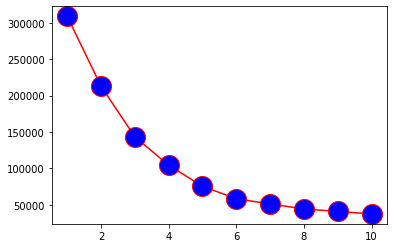

In [13]:
plt.plot(range(1,11),e,color="red",marker="o",markerfacecolor="blue",markersize=20)

# Optimal Value Here is K=6

In [14]:
k=KMeans(n_clusters=6)
k.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Making Predections

In [15]:
pred=k.predict(x)

In [16]:
pred

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 5, 4, 5, 0,
       2, 4, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0,
       5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5, 5, 0,
       0, 5, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 3, 0, 3, 1, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

# Evulating The Performance of the model


# We use Silhoutte_score as an evulation metric 

# It Ranges from -1 to +1 

# -1 meaning that the sample have been placed in the wrong cluster

# 0 meaning that the mean distance from the cluster to the sample is small.

# +1 meaning that the mean distance from the cluster to the sample is large.





In [17]:
from sklearn.metrics import silhouette_score

In [18]:
print(silhouette_score(x,pred))

0.45205475380756527


In [19]:
import numpy as np
x=np.array(x)

# Visuvalizing The Clusters

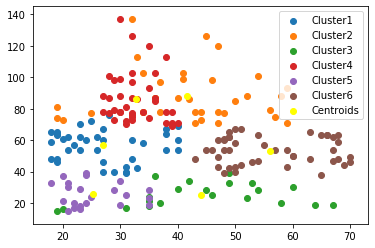

In [20]:
plt.scatter(x[pred==0,0],x[pred==0,1],cmap="spring",label="Cluster1")
plt.scatter(x[pred==1,0],x[pred==1,1],cmap="winter",label="Cluster2")
plt.scatter(x[pred==2,0],x[pred==2,1],cmap="muted",label="Cluster3")
plt.scatter(x[pred==3,0],x[pred==3,1],cmap="summer",label="Cluster4")
plt.scatter(x[pred==4,0],x[pred==4,1],cmap="coolwarm",label="Cluster5")
plt.scatter(x[pred==5,0],x[pred==5,1],cmap="Blues",label="Cluster6")
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],color="yellow",label="Centroids")
plt.legend()

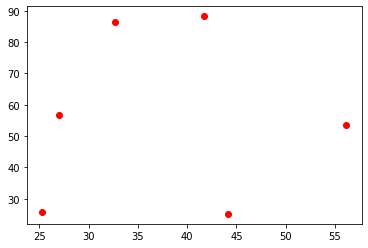

In [21]:
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],color="red")

# How Clustering works ?

# Step 1 : place the random samples in a large space

# Step 2 : Pick 2 samples Randomly from the large space (K=2)

# Step 3 : Calculate the Distance Between Those 2  samples and take minimum distance into consederation.

# Step 4 : Reposition the centroids 

# Step 5 : If all the observations have been grouped  then it got converged else repeat the steps 3 and 4 until it get convorged